**Chuẩn bị các thư viện**

Video tham khảo:  
https://youtu.be/ZVR2Way4nwQ

In [25]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import (
    confusion_matrix, roc_curve, auc, 
    precision_recall_fscore_support, accuracy_score,
    classification_report
)
import matplotlib.pyplot as plt


### Cây quyết định (Decision Tree)
Cây quyết định là một thuật toán học có giám sát được sử dụng cho các bài toán phân loại và hồi quy. Mô hình này dựa trên việc học các quy tắc điều kiện từ dữ liệu để đưa ra dự đoán cho các nhãn của dữ liệu mới. Cây quyết định mô phỏng quá trình ra quyết định bằng cách phân tách dữ liệu dựa vào các thuộc tính và dẫn đến các kết quả tại node lá.

### Input phù hợp cho cây quyết định
Cây quyết định có thể xử lý cả dữ liệu định tính (categorical) và định lượng (numerical).
Tuy nhiên, chúng hiệu quả nhất với các thuộc tính định tính (categorical).

### Các thành phần của cây quyết định
* Node gốc (Root node):
  * Là điểm bắt đầu của cây.
  * Chứa toàn bộ tập dữ liệu và thực hiện phân chia đầu tiên dựa trên thuộc tính phù hợp nhất.
* Node trung gian (Internal node):
  * Đại diện cho các quyết định dựa trên thuộc tính cụ thể.
  * Mỗi node trung gian chia dữ liệu thành nhiều nhánh dựa trên giá trị của thuộc tính.
* Node lá (Leaf node):
  * Node lá đại diện cho kết quả cuối cùng (nhãn phân loại hoặc giá trị dự đoán).
  * Mỗi node lá chứa một lớp phân loại (class label) hoặc giá trị trong trường hợp hồi quy.


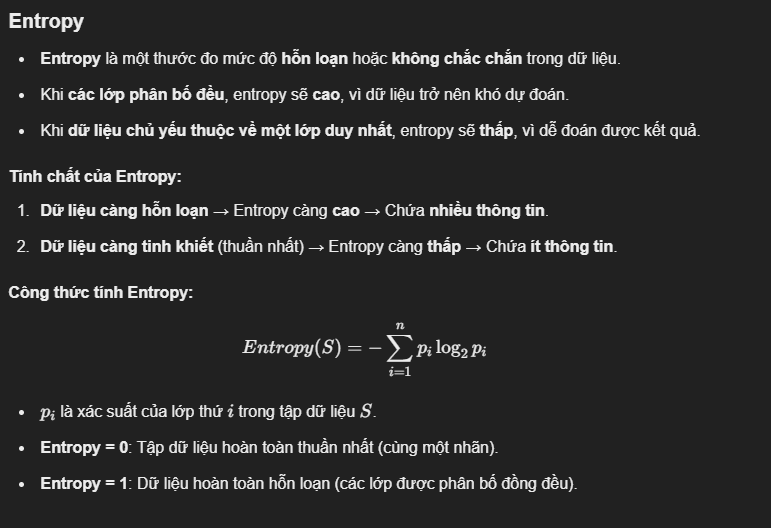

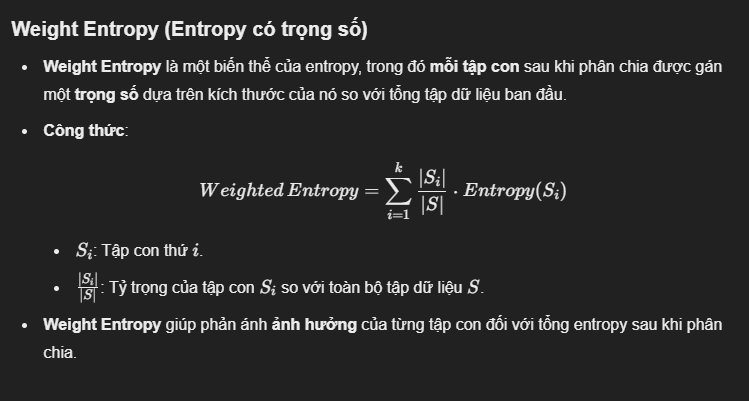

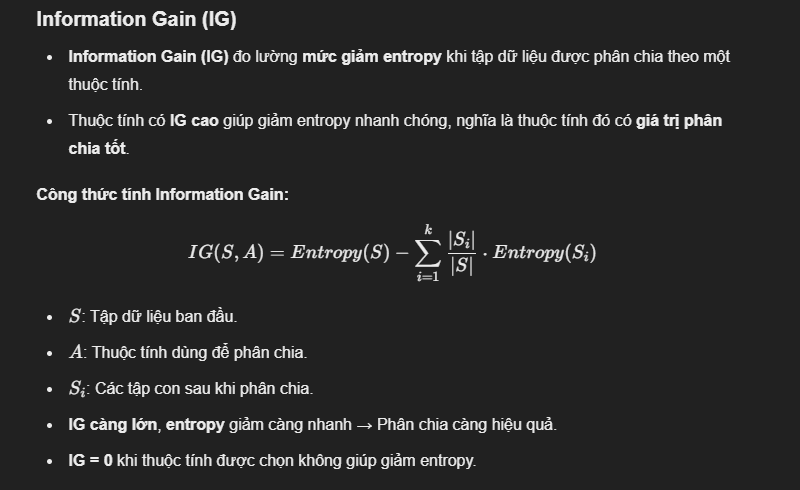

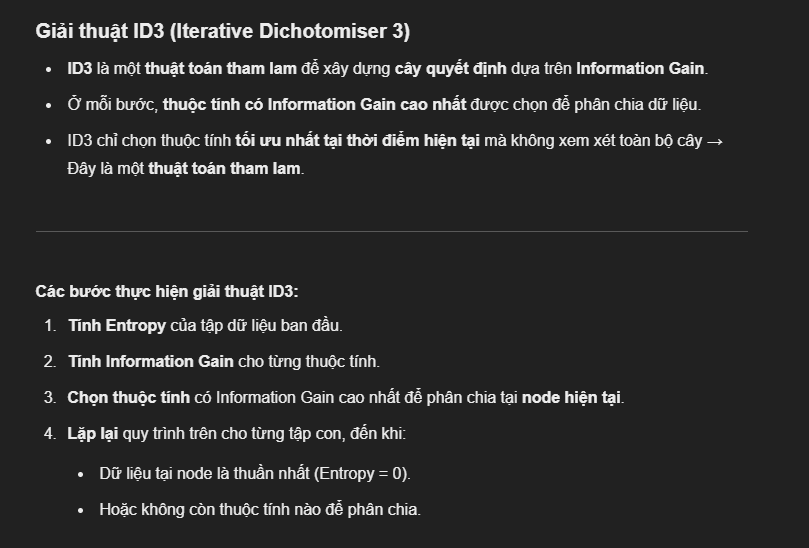

In [26]:
df = pd.read_excel("data/lophoc.xlsx")
df

,Sức khỏe,Thời tiết,Kết quả
0,ốm,u ám,có
1,ốm,mưa,có
2,ốm,nắng,không
3,ốm,u ám,có
4,tốt,u ám,không
5,tốt,mưa,không
6,tốt,nắng,có


In [27]:
# Xử lý dữ liệu thành dạng số
# Câu hỏi: Tại sao không sử dụng OneEncoding mà dùng Label Encoding?
# Do thuật toán chỉ tính xác suất mà không quan tâm so sánh đo lường,
# nên các giá trị nhãn sẽ không ảnh hưởng về mặt giá trị độ lớn

# Mã hóa cột 'Sức khỏe'
encHealth = preprocessing.LabelEncoder()
df['Sức khỏe'] = encHealth.fit_transform(df['Sức khỏe'])

# Mã hóa cột 'Thời tiết'
encWeather = preprocessing.LabelEncoder()
df['Thời tiết'] = encWeather.fit_transform(df['Thời tiết'])

# Mã hóa cột 'Kết quả'
encResult = preprocessing.LabelEncoder()
df['Kết quả'] = encResult.fit_transform(df['Kết quả'])

# Kiểm tra dữ liệu sau khi mã hóa
df


,Sức khỏe,Thời tiết,Kết quả
0,1,2,0
1,1,0,0
2,1,1,1
3,1,2,0
4,0,2,1
5,0,0,1
6,0,1,0


Sức khỏe:
  + tốt = 0
  + ốm = 1

Thời tiết:
  + mưa = 0
  + nắng = 1
  + u ám = 2

Kết quả:
  + học: 0
  + nghỉ: 1

In [28]:
# Tạo tập dữ liệu Input (X) và Output (y)
X = df[['Sức khỏe', 'Thời tiết']].values  # Đặc trưng
y = df['Kết quả'].values  # Mục tiêu

# Chia tập dữ liệu thành train và test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=34)

# Kiểm tra tập dữ liệu train và test
print("X_train:\n", X_train)
print("y_train:\n", y_train)

X_train:
 [[0 2]
 [0 1]
 [0 0]
 [1 1]
 [1 0]]
y_train:
 [1 0 1 1 0]


In [29]:
# Khởi tạo mô hình Decision Tree với tiêu chí 'entropy'
modelDT = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Huấn luyện mô hình với tập dữ liệu train
modelDT = modelDT.fit(X_train, y_train)

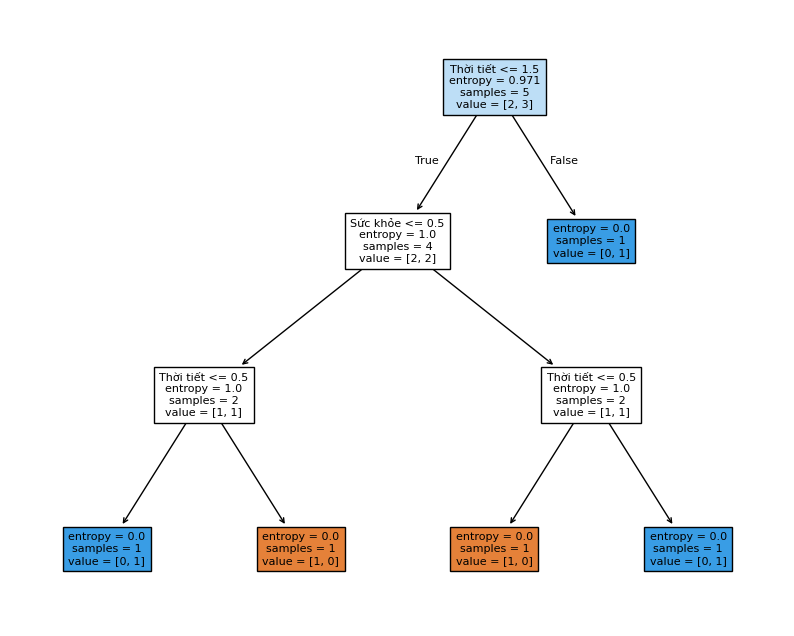

In [30]:
# Hiển thị cây quyết định
feature_cols = ['Sức khỏe', 'Thời tiết']
plt.figure(figsize=(10, 8))
plot_tree(modelDT, feature_names=feature_cols, fontsize=8, filled=True)
plt.show()

In [31]:
# Dự đoán trên tập dữ liệu test
y_pred = modelDT.predict(X_test)

# 1. Tính toán độ chính xác (Accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Độ chính xác của mô hình: {accuracy * 100:.2f}%\n")

# 2. Ma trận nhầm lẫn (Confusion Matrix)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm, "\n")

# 3. Báo cáo chi tiết với Precision, Recall, F1-score
print("Classification Report:\n", 
      classification_report(y_test, y_pred, zero_division=1))

# 4. Tính các chỉ số TPR, FNR, FPR, TNT từ ma trận nhầm lẫn
tn, fp, fn, tp = cm.ravel()

TPR = tp / (tp + fn) if (tp + fn) != 0 else 0  # True Positive Rate (Recall)
FNR = fn / (fn + tp) if (fn + tp) != 0 else 0  # False Negative Rate
FPR = fp / (fp + tn) if (fp + tn) != 0 else 0  # False Positive Rate
TNT = tn / (tn + fp) if (tn + fp) != 0 else 0  # True Negative Rate (Specificity)

# Tính Precision, Recall và F1-score
precision, recall, f1, _ = precision_recall_fscore_support(
    y_test, y_pred, average='binary', zero_division=1
)
print(f"\nPrecision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

Độ chính xác của mô hình: 0.00%

Confusion Matrix:
 [[0 2]
 [0 0]] 

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00       2.0
           1       0.00      1.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.50      0.50      0.00       2.0
weighted avg       1.00      0.00      0.00       2.0


Precision: 0.00
Recall: 1.00
F1-score: 0.00


# Xây dựng chương trình dự báo


Người dùng nhập từ bàn phím sức khỏe và thời tiết. Hãy dự báo trạng thái lớp học
Ví dụ: ["Ốm", "Nắng"] -> Kết quả =?

In [32]:
health = 'ốm'
health_scaled = encHealth.transform([health])

weather = 'nắng'
weather_scaled = encWeather.transform([weather])

feature_sample = np.array([[health_scaled[0], weather_scaled[0]]])

y_sample_pred = modelDT.predict(feature_sample)
y_sample_pred


array([1])

In [33]:
health = 'tốt'
health_scaled = encHealth.transform([health])

weather = 'mưa'
weather_scaled = encWeather.transform([weather])

feature_sample = np.array([[health_scaled[0], weather_scaled[0]]])

y_sample_pred = modelDT.predict(feature_sample)
y_sample_pred

array([1])

In [34]:
import numpy as np

# Yêu cầu nhập sức khỏe từ người dùng
health = input("Nhập tình trạng sức khỏe (ví dụ: tốt, xấu, trung bình): ")
# Chuyển đổi tình trạng sức khỏe thành giá trị đã mã hóa
health_scaled = encHealth.transform([health])

# Yêu cầu nhập thời tiết từ người dùng
weather = input("Nhập tình trạng thời tiết (ví dụ: mưa, nắng, gió): ")
# Chuyển đổi tình trạng thời tiết thành giá trị đã mã hóa
weather_scaled = encWeather.transform([weather])

# Tạo mẫu đặc trưng từ các giá trị đã mã hóa
feature_sample = np.array([[health_scaled[0], weather_scaled[0]]])

# Dự đoán giá trị dựa trên mẫu
y_sample_pred = modelDT.predict(feature_sample)
print("Dự đoán: ", y_sample_pred)

if y_sample_pred[0] == 0:
  print("Có đi học")
else:
  print("Không đi học")

Dự đoán:  [1]
Không đi học
